# Disaster Mitigation and Risk Analysis

In this notebook, we will gather disaster mitigation data from FEMA, join them with our disaster risk data set, and perform exploratory analysis. Our goal process the data for visualization and provide users with information about disaster preparedness. Our two sets of mitigation data are obtained from FEMA:
1. Hazard Mitigation Assistance Mitigated Properties describes properties that received funding from the government for disaster mitigation
2. Hazard Mitigation Assistance Projects lists all the projects funded to aid those in need after a major disaster


### Import libraries

In [ ]:
# Install libraries if required.
!pip3 install --upgrade pip
!pip3 install pandas
!pip3 install scipy
!pip3 install seaborn

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

### Load and process mitigation data

In [2]:
#https://www.fema.gov/openfema-data-page/hazard-mitigation-assistance-mitigated-properties-v2
#https://www.fema.gov/openfema-data-page/hazard-mitigation-assistance-projects-v2
mitigated_property = pd.read_csv("HazardMitigationAssistanceMitigatedProperties.csv", sep = ',')
mitigated_project = pd.read_csv("HazardMitigationAssistanceProjects.csv", sep = ',')

mitigated_property.head()

,disasterNumber,region,stateNumberCode,state,countyCode,county,city,zip,projectIdentifier,propertyAction,...,status,programArea,title,type,numberOfProperties,numberOfRecords,damageCategory,granteeTribalIndicator,subgranteeTribalIndicator,id
0,1604.0,4.0,28.0,Mississippi,27.0,Coahoma,ALLIGATOR,38720,DR-1604-0002-R,Safe Room/Wind Shelter,...,Closed,HMGP,NaN,206.1: Safe Room (Tornado and Severe Wind Shel...,2,NaN,NaN,No,No,6176dfd34f1519431d0550bf
1,1609.0,4.0,12.0,Florida,33.0,Escambia,CANTONMENT,32533,DR-1609-0108-R,Wind Retrofit,...,Closed,HMGP,NaN,205.7: Retrofitting Private Structures - Wind,1,NaN,NaN,No,No,6176dfd34f1519431d0550c1
2,1609.0,4.0,12.0,Florida,33.0,Escambia,PENSACOLA,32504,DR-1609-0108-R,Wind Retrofit,...,Closed,HMGP,NaN,205.7: Retrofitting Private Structures - Wind,1,NaN,NaN,No,No,6176dfd34f1519431d0550c2
3,1604.0,4.0,28.0,Mississippi,115.0,Pontotoc,PONTOTOC,38863,DR-1604-0002-R,Safe Room/Wind Shelter,...,Closed,HMGP,NaN,206.1: Safe Room (Tornado and Severe Wind Shel...,104,NaN,NaN,No,No,6176dfd34f1519431d0550c5
4,1609.0,4.0,12.0,Florida,33.0,Escambia,PENSACOLA,32503,DR-1609-0108-R,Wind Retrofit,...,Closed,HMGP,NaN,205.7: Retrofitting Private Structures - Wind,1,NaN,NaN,No,No,6176dfd34f1519431d0550c6


In [3]:
mitigated_project.head()

,region,stateNumberCode,state,countyCode,county,programArea,projectIdentifier,projectType,projectTitle,projectCounties,...,dateClosed,granteeTribalIndicator,grantee,disasterNumber,benefitCostRatio,netValueBenefits,subgranteeTribalIndicator,hash,lastRefresh,id
0,2,36,New York,59.0,Nassau,PDM,PDMC-PL-02-NY-2017-008,91.5: Local Multijurisdictional Multihazard Mi...,NaN,NASSAU,...,NaN,0.0,New York State Division of Homeland Security a...,NaN,0.000,NaN,0.0,b87b48268dbc228a2816515319ae50ffc1891ded,2021-10-21T16:34:53.277Z,6081a684a0ee349d71357335
1,9,4,Arizona,13.0,Maricopa,FMA,FMA-PJ-09-AZ-2017-002,405.1: Other Minor Flood Control,NaN,MARICOPA,...,NaN,0.0,Arizona Department of Emergency and Military A...,NaN,1.157,2548712.0,0.0,69dd811690cf4c5310205fd3e8e052d17c6599f2,2021-10-21T16:35:22.547Z,6081a684a0ee349d71357337
2,8,38,North Dakota,55.0,McLean,PDM,PDMC-PJ-08-ND-2017-009,401.1: Water and Sanitary Sewer System Protect...,NaN,MCLEAN,...,NaN,0.0,North Dakota Department of Emergency Services,NaN,1.310,4840209.0,0.0,82ee3e0f8fb3469646f6c34bdf0702b1811af480,2021-10-21T16:35:11.166Z,6081a684a0ee349d71357339
3,1,23,Maine,NaN,NaN,PDM,PDMC-MC-01-ME-2017-002,700.2: Management Costs - Equipment,NaN,NaN,...,NaN,0.0,Maine Emergency Management Agency,NaN,0.000,NaN,0.0,da199fb23569f143698f4c8517a073f3f54b703a,2021-10-21T16:34:43.973Z,6081a684a0ee349d71357340
4,3,42,Pennsylvania,NaN,NaN,FMA,FMA-PJ-03-PA-2017-011,200.1: Acquisition of Private Real Property (S...,NaN,NaN,...,NaN,0.0,PA Emergency Management Agency,NaN,1.000,1.0,0.0,2014cb131da7685005381764ecb29f22fe545ba9,2021-10-21T16:35:18.866Z,6081a684a0ee349d7135733b


In [4]:
#select important columns
mitigated_project = mitigated_project[['projectIdentifier', 'projectType', 'projectTitle', 'numberOfFinalProperties', 'costSharePercentage', 'projectAmount','benefitCostRatio', 'netValueBenefits']]

#join data sets on project identifier
mitigation_data = mitigated_property.merge(mitigated_project, how = 'inner', on = 'projectIdentifier')

# only taking columns of interest
mitigation_data = mitigation_data[["zip", 'projectIdentifier', "propertyAction", "structureType", "typeOfResidency","actualAmountPaid", "damageCategory", "numberOfProperties","numberOfFinalProperties","costSharePercentage", "projectAmount", "benefitCostRatio", "netValueBenefits"]]

# filtering invalid data
mitigation_data = mitigation_data[mitigation_data['zip'].apply(lambda x: str(x).isdigit())]
mitigation_data = mitigation_data.dropna(axis=0, how='any')

# convert datatypes
mitigation_data = mitigation_data.astype({'zip': 'int64'})

print(mitigation_data.shape)
mitigation_data.head()

(12793, 13)


,zip,projectIdentifier,propertyAction,structureType,typeOfResidency,actualAmountPaid,damageCategory,numberOfProperties,numberOfFinalProperties,costSharePercentage,projectAmount,benefitCostRatio,netValueBenefits
2,38847,DR-1604-0002-R,Safe Room/Wind Shelter,Other (Specify in Comments),Other (Specify in Comments),3848.0,50 - 99%,4,8043,1.0,20069278.0,0.0,0.0
5,38826,DR-1604-0002-R,Safe Room/Wind Shelter,Other (Specify in Comments),Not Applicable,3848.0,50 - 99%,9,8043,1.0,20069278.0,0.0,0.0
7,39339,DR-1604-0002-R,Safe Room/Wind Shelter,Other (Specify in Comments),Not Applicable,3848.0,50 - 99%,11,8043,1.0,20069278.0,0.0,0.0
9,38601,DR-1604-0002-R,Safe Room/Wind Shelter,Other (Specify in Comments),Not Applicable,3848.0,50 - 99%,7,8043,1.0,20069278.0,0.0,0.0
14,39040,DR-1604-0002-R,Safe Room/Wind Shelter,Other (Specify in Comments),Not Applicable,3848.0,50 - 99%,12,8043,1.0,20069278.0,0.0,0.0


Each row above represents a property that received help by the US government for disaster mitigation. The columns provides information about the property, amount of money received, and each specific projects. To see more details for each column, please follow the links in cell 2. Here, we've filtered out all the unneccesary columns.

In [5]:
#group mitigation data by zipcode
mitigation_data_group_zipcode = mitigation_data.groupby(["zip"], as_index=False).agg({
        "actualAmountPaid": "sum",
        "numberOfProperties":"sum",
        "numberOfFinalProperties": "sum",
        "costSharePercentage": "mean",
        "projectAmount": "mean",
        "benefitCostRatio": "mean",
        "netValueBenefits": "mean",
        "propertyAction": "max",
        "damageCategory": "max",
        "structureType": "max"
    })
mitigation_data_group_zipcode

,zip,actualAmountPaid,numberOfProperties,numberOfFinalProperties,costSharePercentage,projectAmount,benefitCostRatio,netValueBenefits,propertyAction,damageCategory,structureType
0,0,1237954.0,9,329,1.00,3.629147e+06,1.298222,4.598224e+06,Wind Retrofit,0 - 49%,Single Family
1,602,3091.0,1,45,0.75,2.378280e+05,13.677000,3.735690e+06,Wind Retrofit,0 - 49%,Non-residential - Public
2,603,1672.0,1,45,0.75,2.378280e+05,13.677000,3.735690e+06,Wind Retrofit,0 - 49%,Non-residential - Public
3,606,3066.0,1,45,0.75,2.378280e+05,13.677000,3.735690e+06,Wind Retrofit,0 - 49%,Non-residential - Public
4,612,9238.0,1,45,0.75,2.378280e+05,13.677000,3.735690e+06,Wind Retrofit,0 - 49%,Non-residential - Public
...,...,...,...,...,...,...,...,...,...,...,...
2050,99645,177340.0,5,40,0.75,2.107760e+05,1.268000,3.343370e+05,Wind Retrofit,0 - 49%,Non-residential - Public
2051,99664,90678.0,1,1,0.75,1.215292e+05,1.047000,9.419400e+04,Acquisition/Relocation,50 - 99%,Single Family
2052,99714,377666.0,10,55,0.75,2.545325e+05,1.661000,5.155395e+05,Acquisition/Relocation,0 - 49%,Vacant Land
2053,99741,5138197.0,28,812,0.75,5.187580e+06,0.000000,0.000000e+00,Elevation,0 - 49%,Single Family


In [6]:
# printing mitigation data schema
mitigation_data_group_zipcode.dtypes

zip                          int64
actualAmountPaid           float64
numberOfProperties           int64
numberOfFinalProperties      int64
costSharePercentage        float64
projectAmount              float64
benefitCostRatio           float64
netValueBenefits           float64
propertyAction              object
damageCategory              object
structureType               object
dtype: object

In [7]:
# printing metrics for mitigation data
print("number of rows: " + str(mitigation_data_group_zipcode.shape[0]))
print("number of cols: " + str(mitigation_data_group_zipcode.shape[1]))

number of rows: 2055
number of cols: 11


### Load and process risk data (flood, earthquake, and wildfire risk)

In [8]:
all_disaster_cluster = pd.read_csv("flood_earthquake_wildfire_data_clustered.txt", sep = ',')
all_disaster_cluster = all_disaster_cluster.rename(columns={"zipcode": "zip"})
all_disaster_cluster = all_disaster_cluster[["zip", "count_property", "pct_fs_risk_2020_5","pct_fs_risk_2050_5", "pct_fs_risk_2020_100", "pct_fs_risk_2050_100","pct_fs_risk_2020_500", "pct_fs_risk_2050_500", "total_population", "pop_density","cluster_label", "Log Flood Risk", "Log Fire Risk", "Quake Risk", "Log Population Density"]]
all_disaster_cluster.head()

/opt/miniconda3/envs/hw4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,zip,count_property,pct_fs_risk_2020_5,pct_fs_risk_2050_5,pct_fs_risk_2020_100,pct_fs_risk_2050_100,pct_fs_risk_2020_500,pct_fs_risk_2050_500,total_population,pop_density,cluster_label,Log Flood Risk,Log Fire Risk,Quake Risk,Log Population Density
0,36083,8936,4.8,5.1,8.1,8.5,9.5,9.8,7316,11.089038,21,0.057189,0.956959,-0.316710,-0.543199
1,35441,1891,7.9,14.5,41.9,43.3,45.6,45.8,972,5.623359,24,-3.027988,0.560586,0.957885,-0.818875
2,35051,4784,6.9,7.2,13.4,13.8,15.5,15.9,9838,35.106068,14,-0.941448,0.965247,0.602338,-0.071820
3,35121,11527,8.2,8.5,13.1,13.5,15.0,15.6,16123,43.255813,14,-0.978951,0.681246,0.814824,0.013806
4,35058,5868,3.4,3.6,5.3,5.4,6.2,6.4,8630,48.472275,23,0.949411,0.292169,0.252884,0.060526


In [9]:
# printing flood data schema
all_disaster_cluster.dtypes

zip                         int64
count_property              int64
pct_fs_risk_2020_5        float64
pct_fs_risk_2050_5        float64
pct_fs_risk_2020_100      float64
pct_fs_risk_2050_100      float64
pct_fs_risk_2020_500      float64
pct_fs_risk_2050_500      float64
total_population            int64
pop_density               float64
cluster_label               int64
Log Flood Risk            float64
Log Fire Risk             float64
Quake Risk                float64
Log Population Density    float64
dtype: object

In [10]:
# printing metrics for earthquake and flood data
print("number of rows: " + str(all_disaster_cluster.shape[0]))
print("number of cols: " + str(all_disaster_cluster.shape[1]))

number of rows: 32146
number of cols: 15


In [11]:
#let's create a data frame and match zip codes to clusters
zipcode_cluster_data = all_disaster_cluster.drop_duplicates(subset=['zip', 'cluster_label'], keep=False)
zipcode_cluster_data = zipcode_cluster_data[['zip', 'cluster_label']]
zipcode_cluster_data.head()

,zip,cluster_label
0,36083,21
1,35441,24
2,35051,14
3,35121,14
4,35058,23


In [12]:
# printing metrics for zipcode cluster data
print("number of rows: " + str(zipcode_cluster_data.shape[0]))

number of rows: 32146


### Merge disaster mitigation + risk data

In [13]:
#add cluster number of the mitigation data set
mitigation_data_group_zipcode = mitigation_data_group_zipcode.merge(zipcode_cluster_data, on = 'zip', how= 'inner')

In [14]:
#merge mitigation and risk data sets using zipcode
mitigation_and_risk= mitigation_data_group_zipcode.merge(all_disaster_cluster, how = 'inner', on = 'zip')
mitigation_and_risk.drop('cluster_label_y', axis=1,inplace=True)
mitigation_and_risk.rename(columns={'cluster_label_x':'cluster_label'},inplace=True)
mitigation_and_risk

,zip,actualAmountPaid,numberOfProperties,numberOfFinalProperties,costSharePercentage,projectAmount,benefitCostRatio,netValueBenefits,propertyAction,damageCategory,...,pct_fs_risk_2020_100,pct_fs_risk_2050_100,pct_fs_risk_2020_500,pct_fs_risk_2050_500,total_population,pop_density,Log Flood Risk,Log Fire Risk,Quake Risk,Log Population Density
0,1904,172868.0,1,12,0.75,2.172265e+06,3.182000,7.001148e+06,Acquisition/Demolition,0 - 49%,...,11.3,11.9,15.9,16.7,17294,1476.254026,0.655438,-0.126742,0.945153,1.464559
1,2045,137364.0,1,1,0.75,1.923120e+05,4.720000,1.500090e+06,Elevation,50 - 99%,...,62.7,66.8,67.4,71.2,10455,1516.409861,-4.292358,-0.191868,0.920237,1.475595
2,2066,35500.0,2,28,0.45,5.475330e+05,1.096000,6.000000e+05,Elevation,0 - 49%,...,20.4,23.8,26.0,30.7,18239,415.590246,-2.154715,0.644626,0.932648,0.943378
3,2346,200000.0,2,12,0.75,5.188590e+05,2.792000,1.448502e+06,Acquisition of Vacant Land,50 - 99%,...,6.1,6.3,8.9,9.3,24802,139.110274,1.118006,0.674668,0.870500,0.493517
4,2351,35000.0,1,11,0.75,1.316666e+06,1.160000,2.168607e+06,Elevation,0 - 49%,...,4.5,5.0,7.6,8.0,16436,656.206699,2.556873,0.689205,0.895737,1.131179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,98520,31193.0,1,1,0.75,3.119300e+04,5.743000,2.045790e+05,Seismic Retrofit,0 - 49%,...,48.6,50.3,53.0,53.8,24286,39.285518,-3.477057,0.295564,4.184255,-0.025689
1814,98531,1849018.0,26,561,0.75,1.519026e+06,1.304808,2.399245e+06,Elevation,50 - 99%,...,35.2,36.6,58.9,60.7,26031,73.540806,-2.885416,0.574851,3.883929,0.231656
1815,98532,263371.0,15,64,0.75,1.191982e+06,1.177000,1.407387e+06,Elevation,50 - 99%,...,18.7,19.3,25.0,25.5,24084,28.829583,-1.714571,0.499883,3.781046,-0.152565
1816,98568,169925.0,3,5,0.75,8.809800e+04,1.520000,1.375167e+05,Elevation,50 - 99%,...,30.6,31.4,39.8,40.9,2461,6.323187,-2.821961,0.552521,4.163556,-0.771437


In [15]:
#let's write these data sets to csv files so the visualization team can use them downstream
mitigation_data_group_zipcode.to_csv("mitigation_data.csv", index=False)
mitigation_and_risk.to_csv("mitigation_and_risk_data.csv", index = False)

### Perform exploratory analysis

Great! Now that we've cleaned all of our data, let's visualize them to see if we can see any important patterns.

As we hover over each zip code in our map, I think it would be nice to see these metrics on the tooltip for each zipcode:
- most common mitigation action taken for properties in a zipcode
- amount of strutural damage experienced by properties in a zipcode
- most common structure type of properties in a zipcode
- total amount spend on mitigation for each zipcode

In [16]:
#let's test out a zip code 98531
mitigation_and_risk[mitigation_and_risk['zip'] == 98531]

,zip,actualAmountPaid,numberOfProperties,numberOfFinalProperties,costSharePercentage,projectAmount,benefitCostRatio,netValueBenefits,propertyAction,damageCategory,...,pct_fs_risk_2020_100,pct_fs_risk_2050_100,pct_fs_risk_2020_500,pct_fs_risk_2050_500,total_population,pop_density,Log Flood Risk,Log Fire Risk,Quake Risk,Log Population Density
1814,98531,1849018.0,26,561,0.75,1.519026e+06,1.304808,2399245.0,Elevation,50 - 99%,...,35.2,36.6,58.9,60.7,26031,73.540806,-2.885416,0.574851,3.883929,0.231656


Above, we can see that this zip code belongs to cluster label 22. Let's compare it to other zip codes in the same cluster.

In [17]:
mitigation_and_risk[mitigation_and_risk['cluster_label'] == 12]

,zip,actualAmountPaid,numberOfProperties,numberOfFinalProperties,costSharePercentage,projectAmount,benefitCostRatio,netValueBenefits,propertyAction,damageCategory,...,pct_fs_risk_2020_100,pct_fs_risk_2050_100,pct_fs_risk_2020_500,pct_fs_risk_2050_500,total_population,pop_density,Log Flood Risk,Log Fire Risk,Quake Risk,Log Population Density
1,2045,137364.0,1,1,0.750000,1.923120e+05,4.720000,1.500090e+06,Elevation,50 - 99%,...,62.7,66.8,67.4,71.2,10455,1516.409861,-4.292358,-0.191868,0.920237,1.475595
83,11757,62251.0,2,6,0.750000,8.024700e+05,2.213000,2.130496e+06,Elevation,0 - 49%,...,30.5,32.3,36.2,43.4,44368,2532.710659,-2.976672,0.222380,-0.035749,1.686519
96,12305,400501.0,3,9,1.000000,8.795690e+05,0.000000,0.000000e+00,Acquisition/Demolition,50 - 99%,...,57.4,59.8,77.2,80.5,5519,1407.197385,-3.774472,-0.509127,0.738809,1.444860
166,15145,144504.0,5,25,0.750000,2.444910e+05,0.000000,0.000000e+00,Acquisition/Demolition,50 - 99%,...,27.0,27.2,29.3,29.7,6864,1345.029710,-2.393026,-0.694174,-1.449538,1.426280
168,15223,394000.0,6,104,0.750000,1.554088e+06,2.387167,4.930588e+06,Acquisition/Demolition,50 - 99%,...,31.0,31.9,36.8,37.2,6589,1327.993412,-2.544122,-0.965554,-1.440865,1.421039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,70615,370877.0,7,47,0.821429,3.384872e+05,1.601429,9.245857e+05,Wind Retrofit,0 - 49%,...,30.3,56.3,49.7,66.5,14206,111.773190,-3.318412,0.412230,-1.235640,0.403616
1604,77013,4435657.0,73,33530,0.750000,5.311057e+07,1.002954,5.933846e+07,Acquisition/Demolition,50 - 99%,...,34.8,38.7,67.1,67.7,19198,845.289109,-2.449620,-0.438241,-1.492520,1.235288
1619,77038,3557696.0,85,7241,0.750000,4.157177e+06,0.014228,8.417722e+05,Acquisition/Demolition,50 - 99%,...,47.8,48.8,76.3,76.9,31912,1308.581547,-2.794588,-0.006289,-1.456025,1.414984
1657,77554,14297970.0,48,2256,0.750000,1.477962e+07,0.000000,0.000000e+00,Acquisition/Demolition,50 - 99%,...,97.0,97.0,97.0,97.0,8556,93.581765,-5.207053,0.618208,-2.759732,0.330639


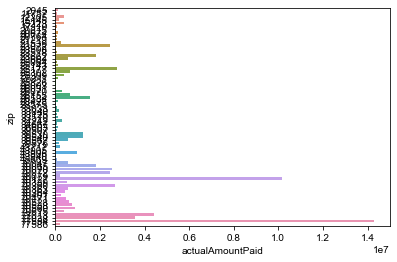

In [18]:
ax = sns.barplot(data = mitigation_and_risk[mitigation_and_risk['cluster_label'] == 12], y='zip', x='actualAmountPaid', orient = 'h')
sns.set(rc = {'figure.figsize':(30,20)})

<AxesSubplot:xlabel='actualAmountPaid', ylabel='Count'>

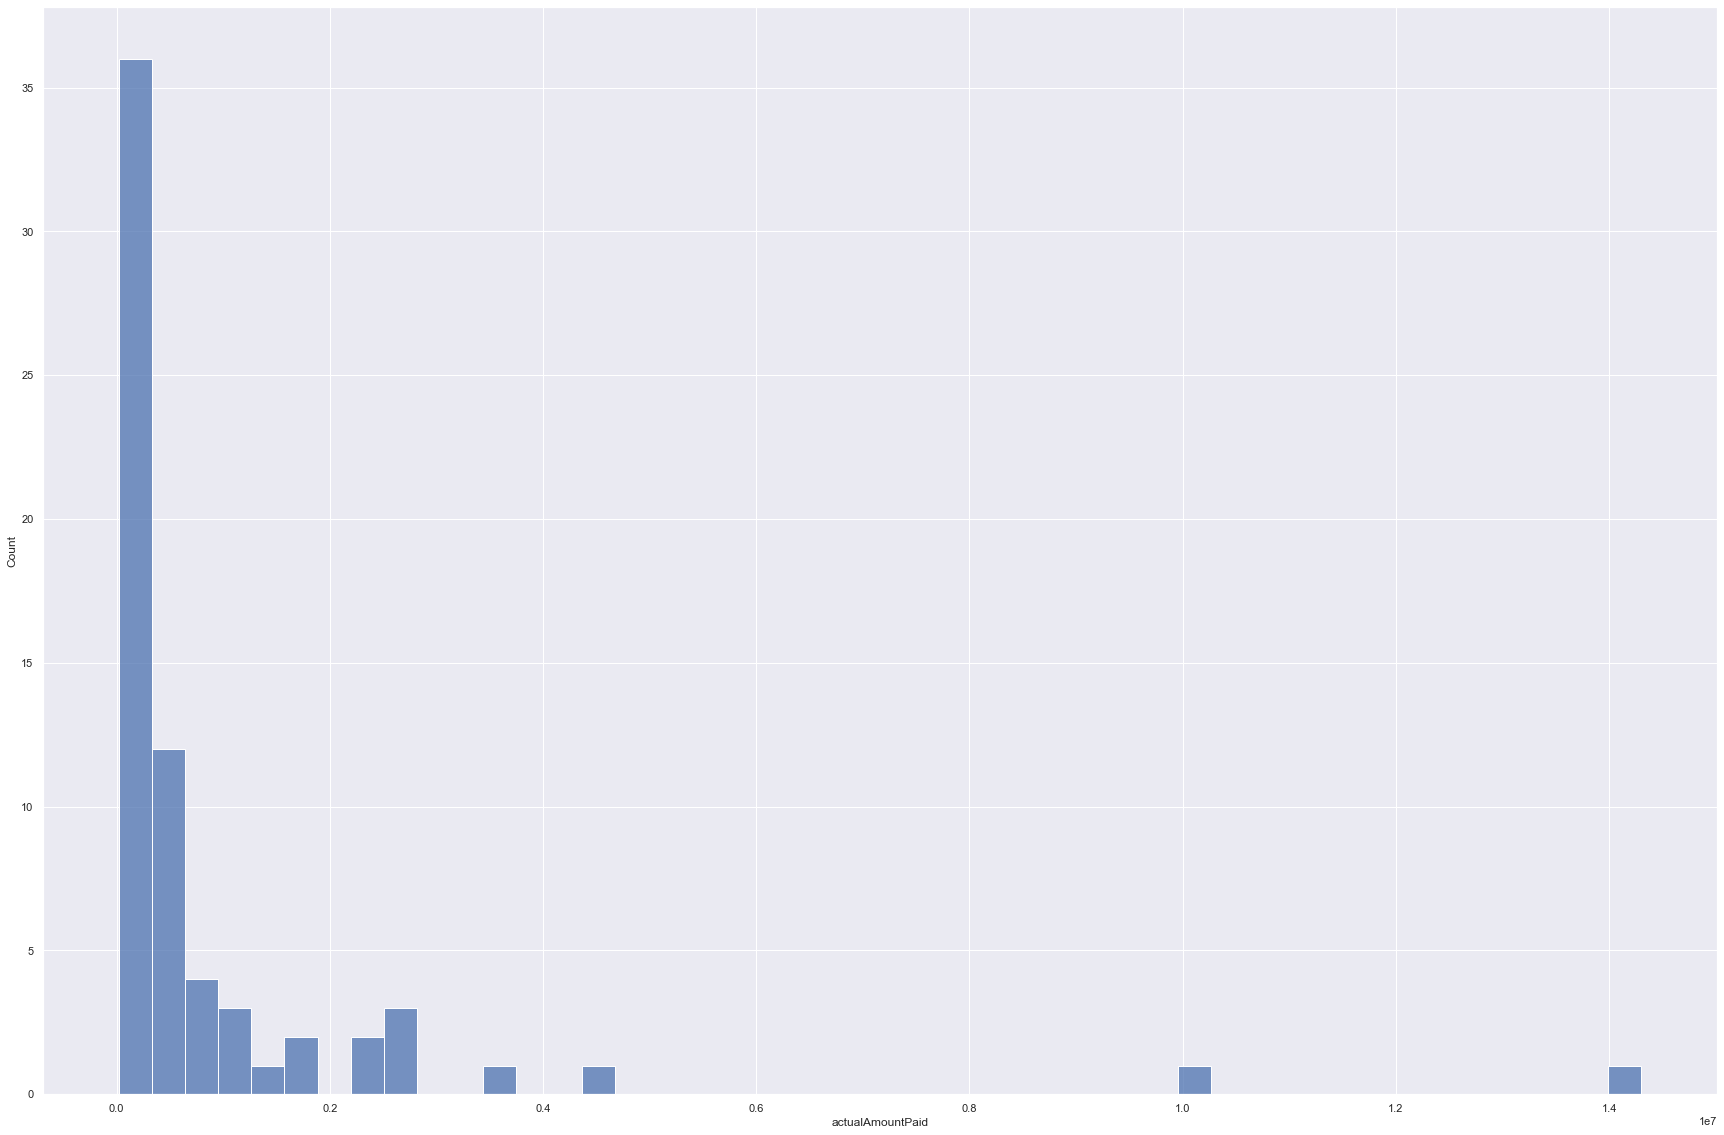

In [19]:
sns.histplot(data = mitigation_and_risk[mitigation_and_risk['cluster_label'] == 12], x = 'actualAmountPaid')

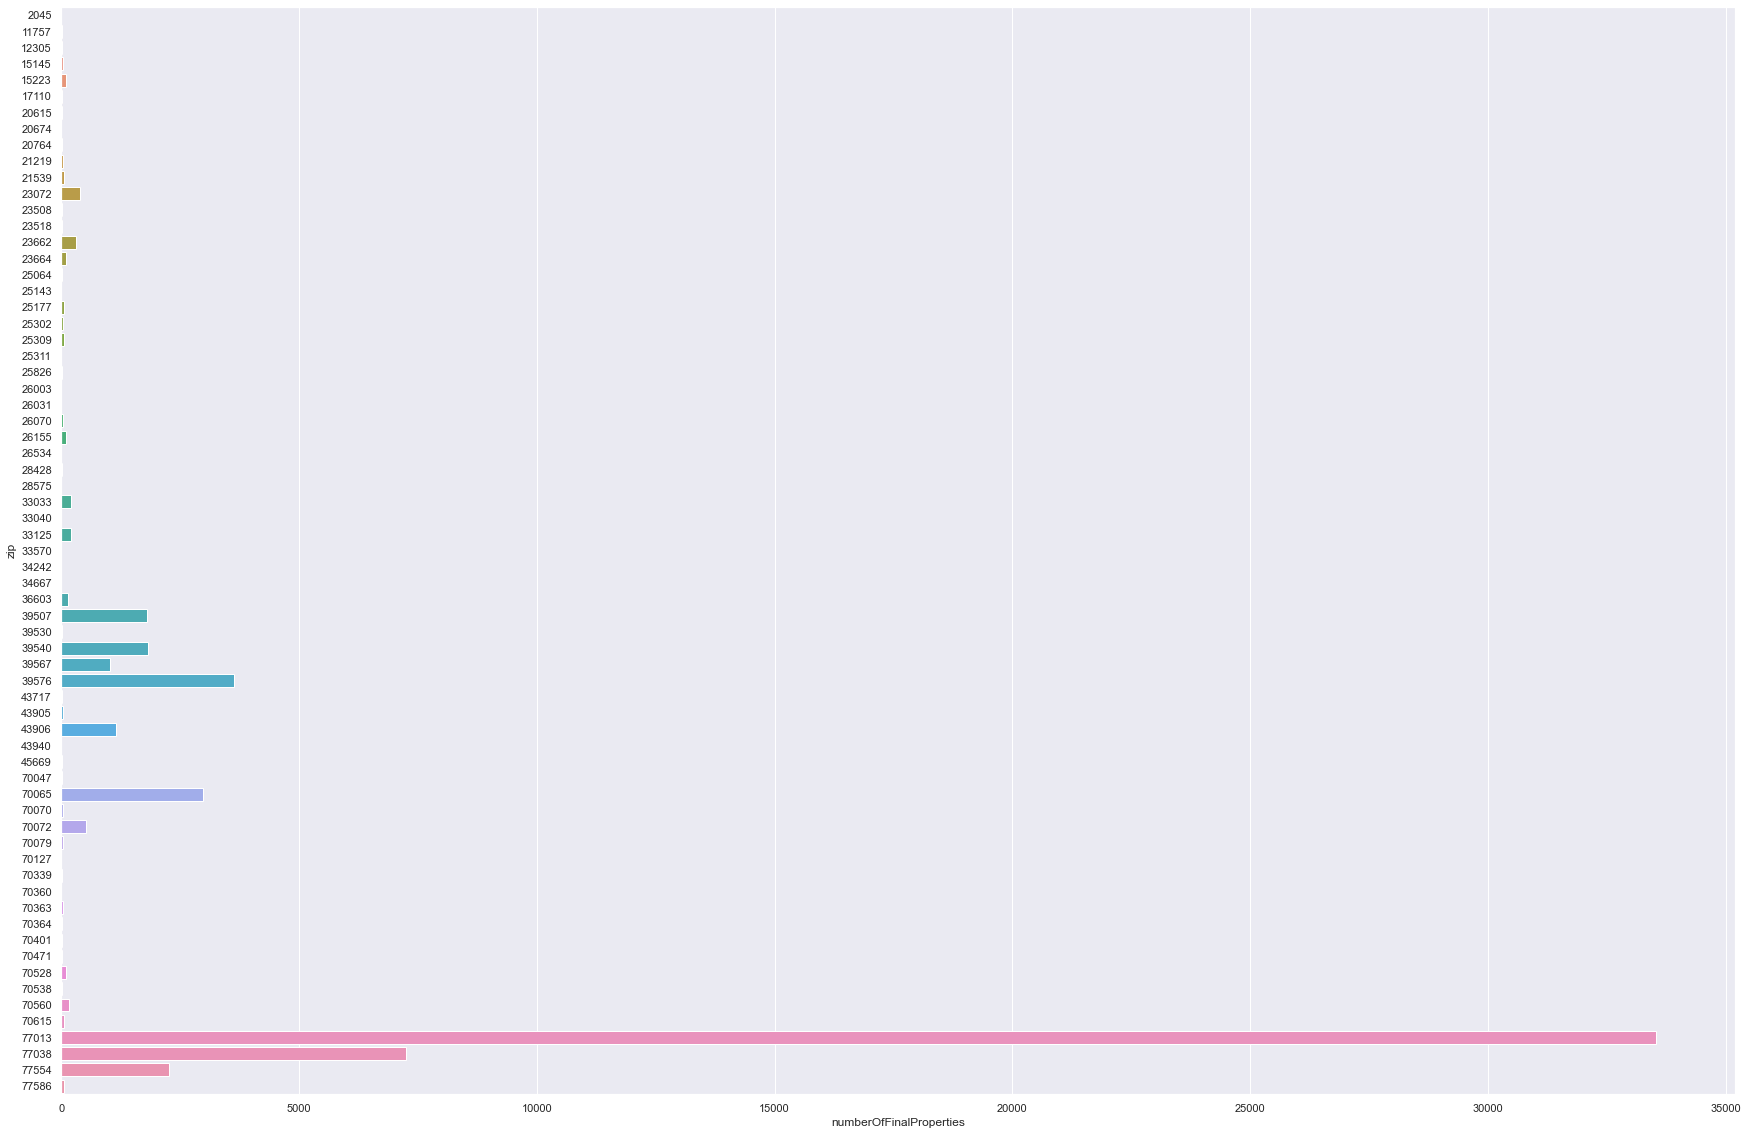

In [20]:
ax = sns.barplot(data = mitigation_and_risk[mitigation_and_risk['cluster_label'] == 12], y='zip', x='numberOfFinalProperties', orient = 'h')
sns.set(rc = {'figure.figsize':(20,15)})

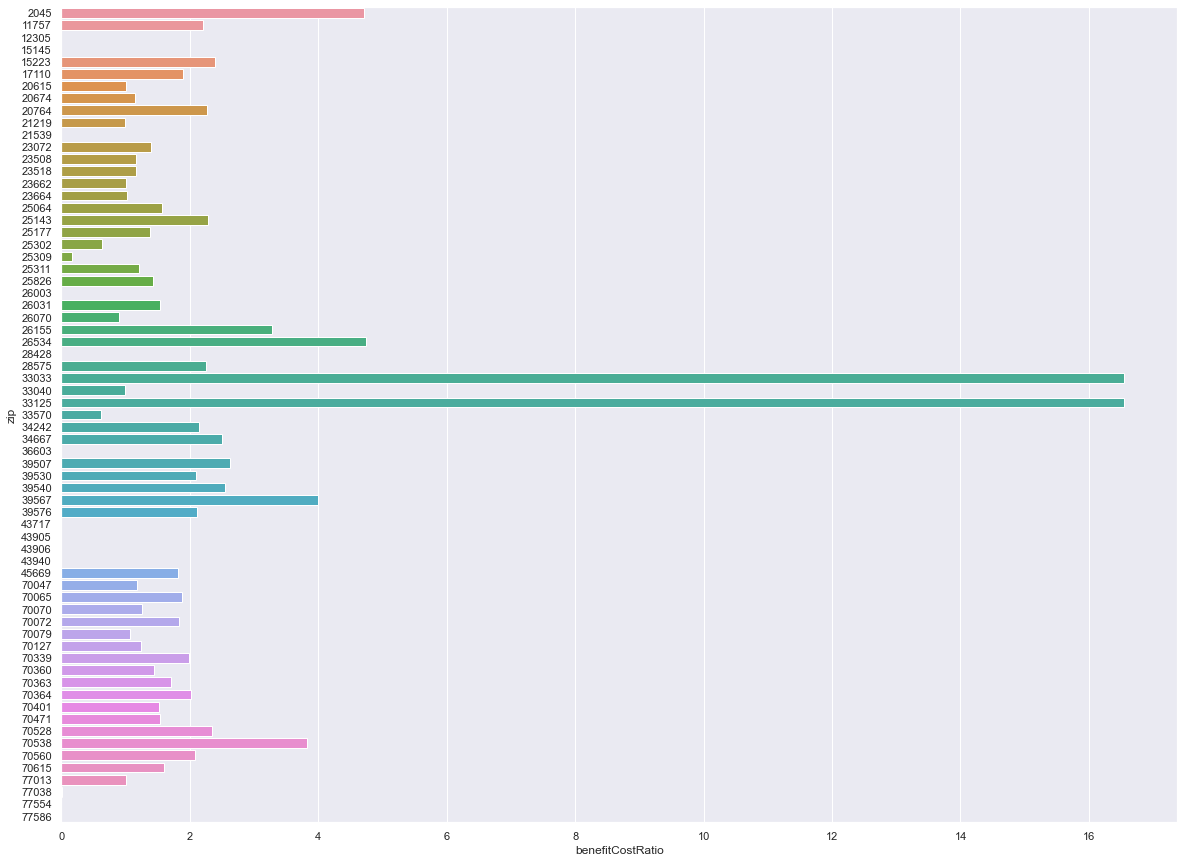

In [21]:
ax = sns.barplot(data = mitigation_and_risk[mitigation_and_risk['cluster_label'] == 12], y='zip', x='benefitCostRatio', orient = 'h')


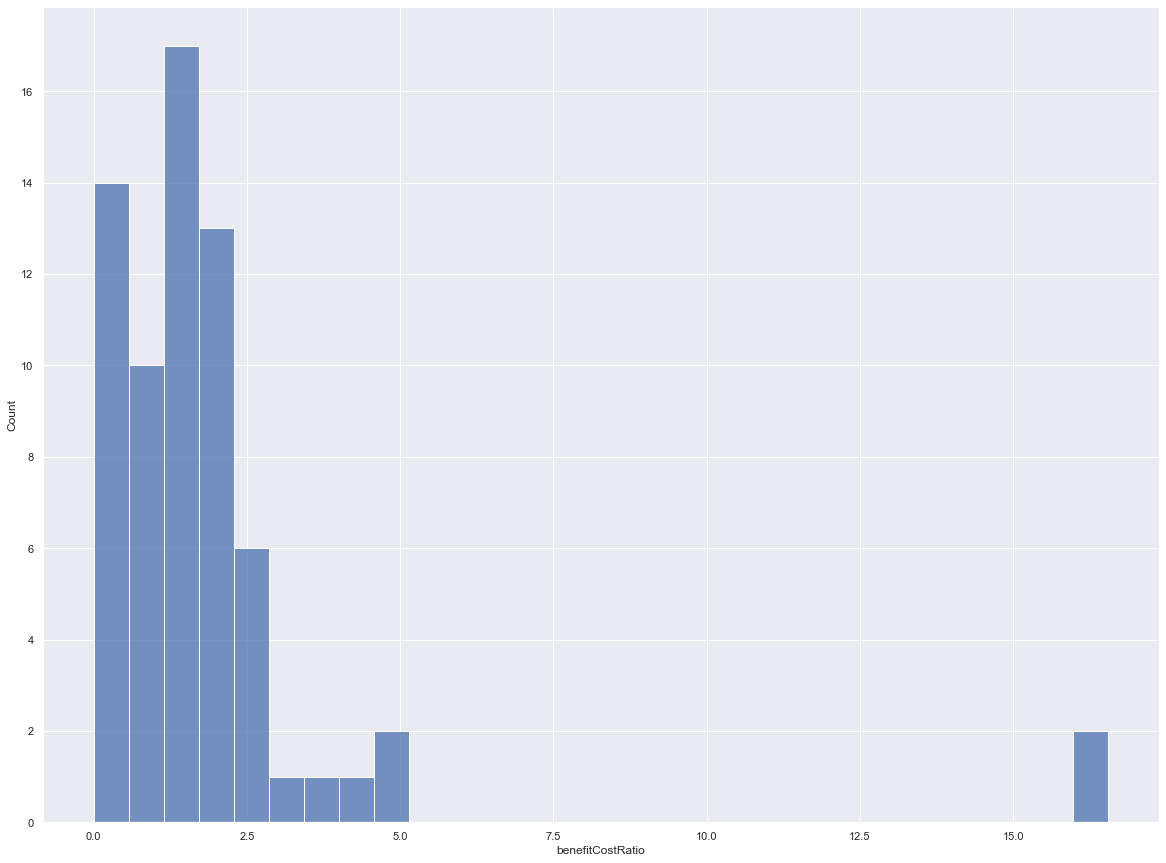

In [22]:
ax = sns.histplot(data = mitigation_and_risk[mitigation_and_risk['cluster_label'] == 12], x='benefitCostRatio')


[None, None]

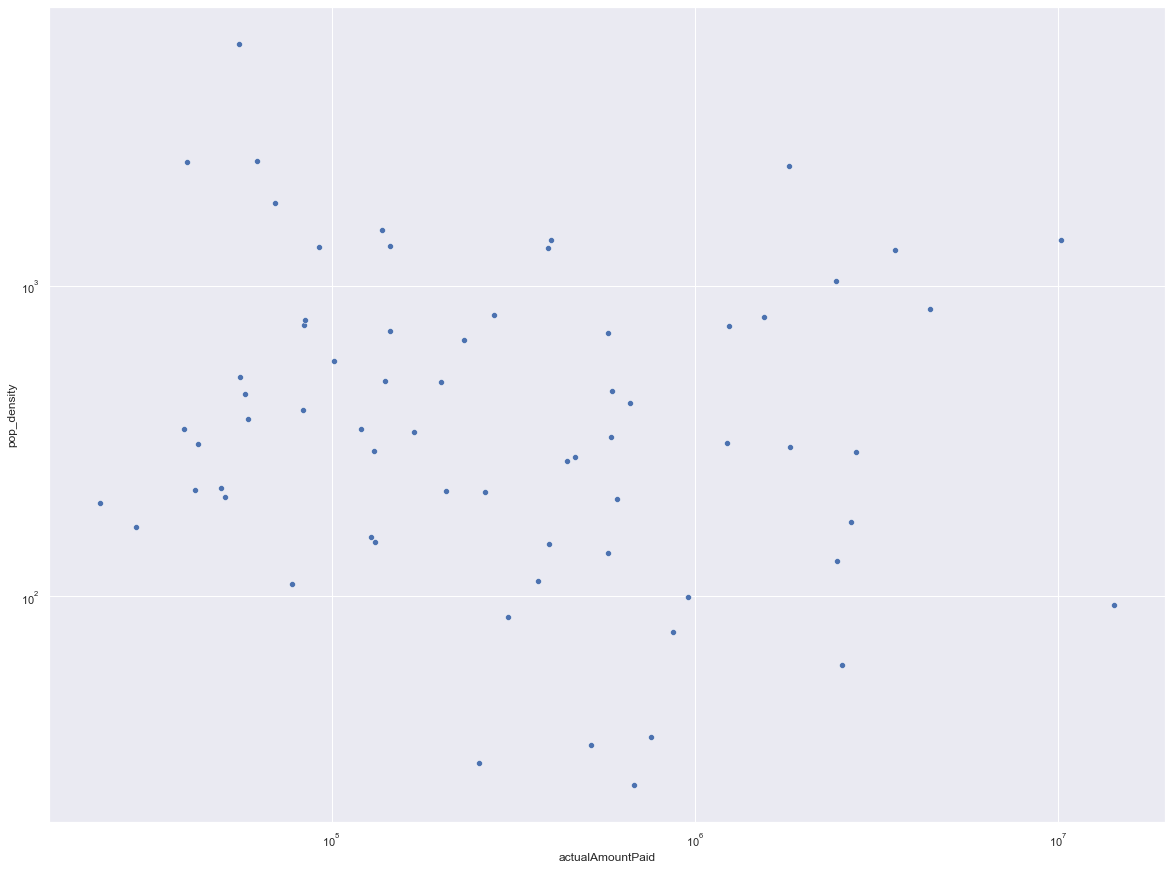

In [23]:
#scatterplot of population vs. amount spent
ax = sns.scatterplot(data = mitigation_and_risk[mitigation_and_risk['cluster_label'] == 12], x='actualAmountPaid', y= 'pop_density')
ax.set(xscale="log", yscale="log")

[None]

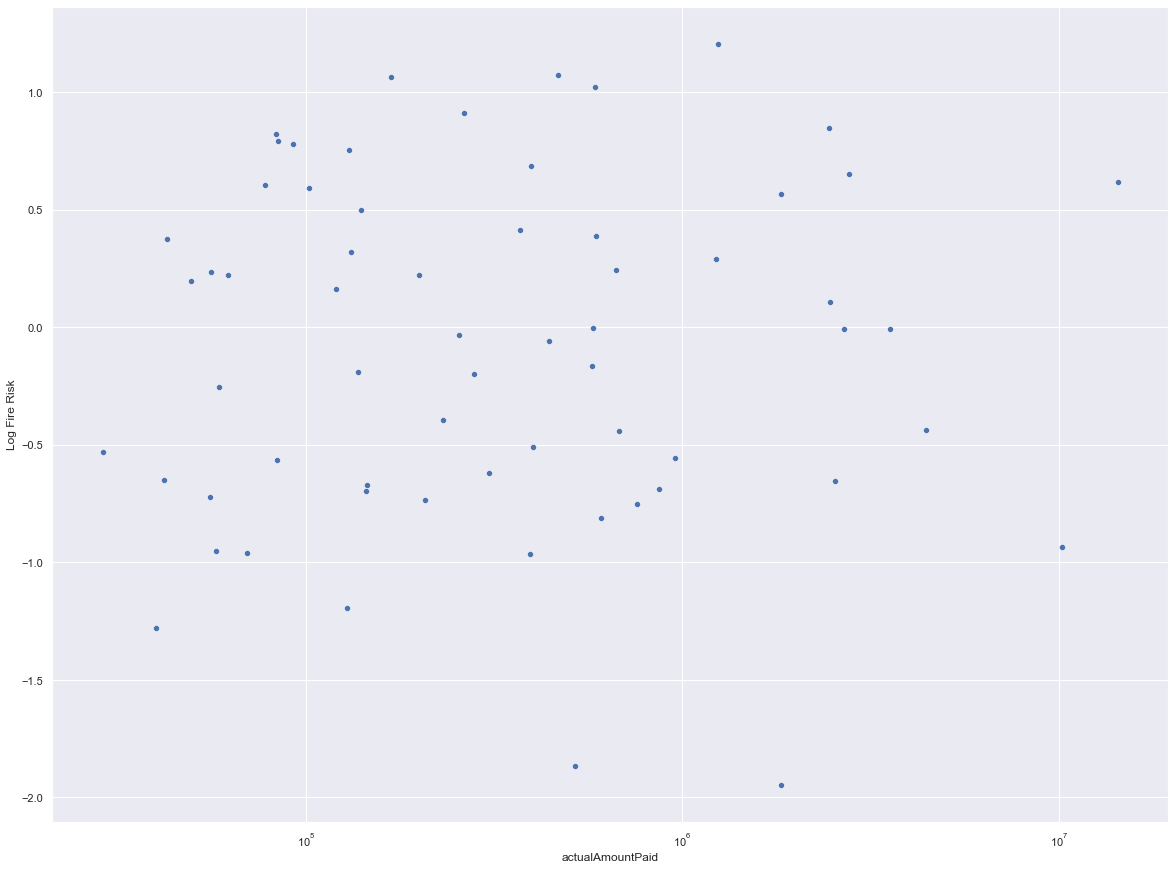

In [24]:
#scatterplot of population vs. fire risk
ax = sns.scatterplot(data = mitigation_and_risk[mitigation_and_risk['cluster_label'] == 12], x='actualAmountPaid', y= 'Log Fire Risk')
ax.set(xscale="log")

[None]

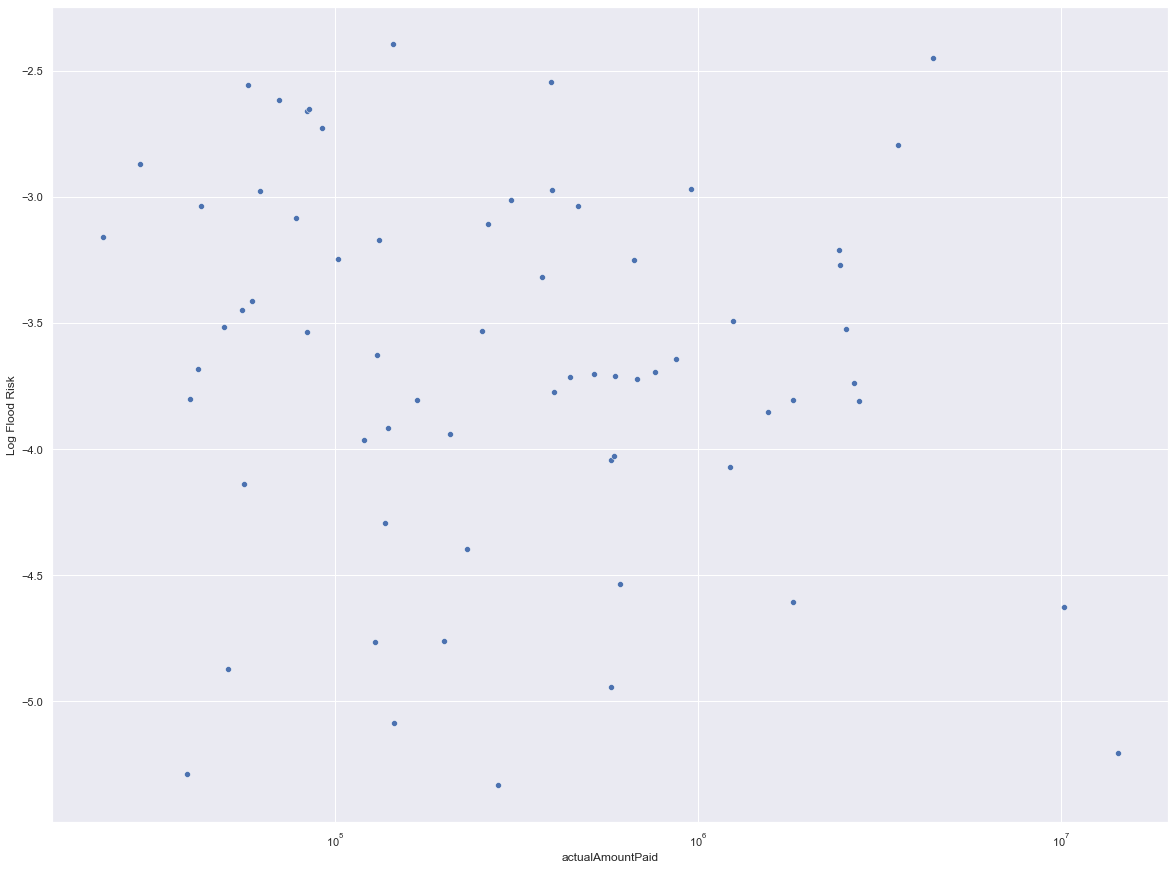

In [25]:
#scatterplot of population vs. flood risk
ax = sns.scatterplot(data = mitigation_and_risk[mitigation_and_risk['cluster_label'] == 12], x='actualAmountPaid', y= 'Log Flood Risk')
ax.set(xscale="log")

[None]

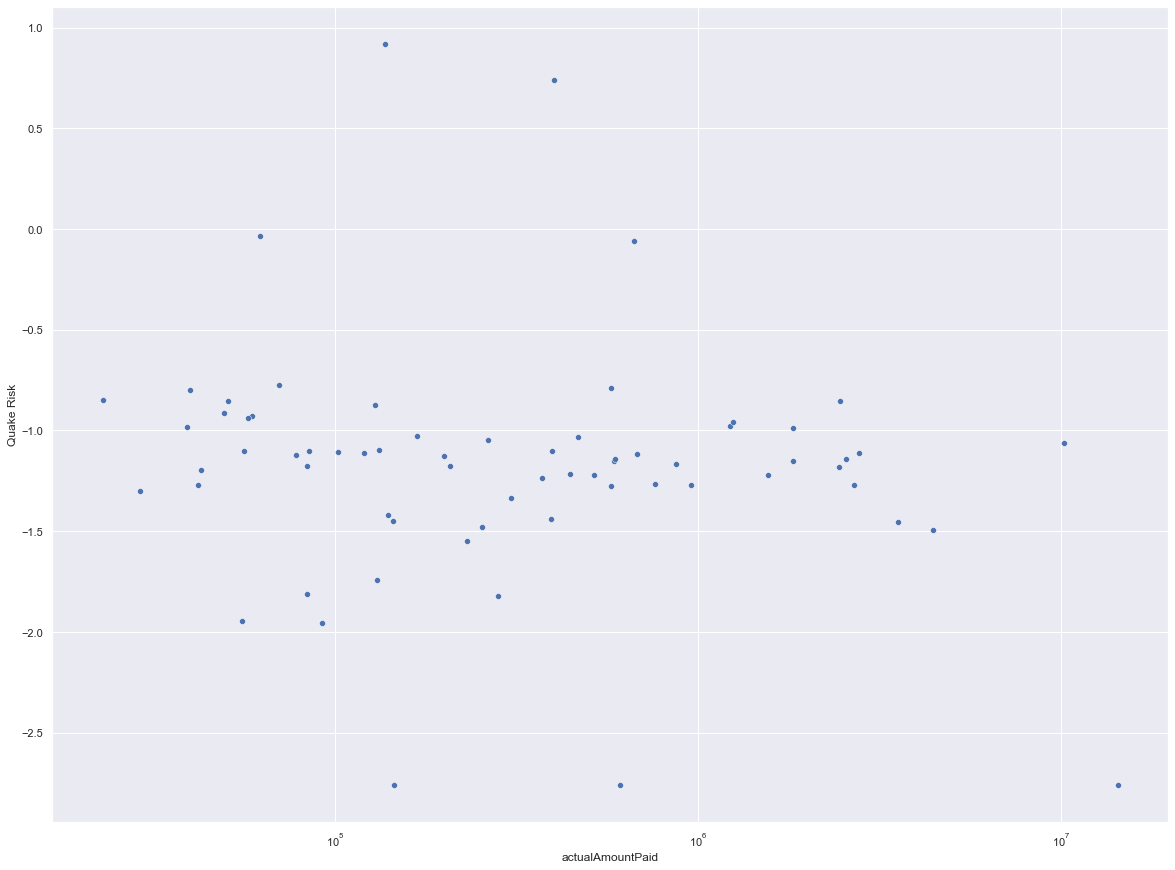

In [26]:
#scatterplot of population vs. earthquake risk
ax = sns.scatterplot(data = mitigation_and_risk[mitigation_and_risk['cluster_label'] == 12], x='actualAmountPaid', y= 'Quake Risk')
ax.set(xscale="log")

In [27]:
zipcode_cluster_data.to_csv('zipcode_cluster_data.csv', index=False)